<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


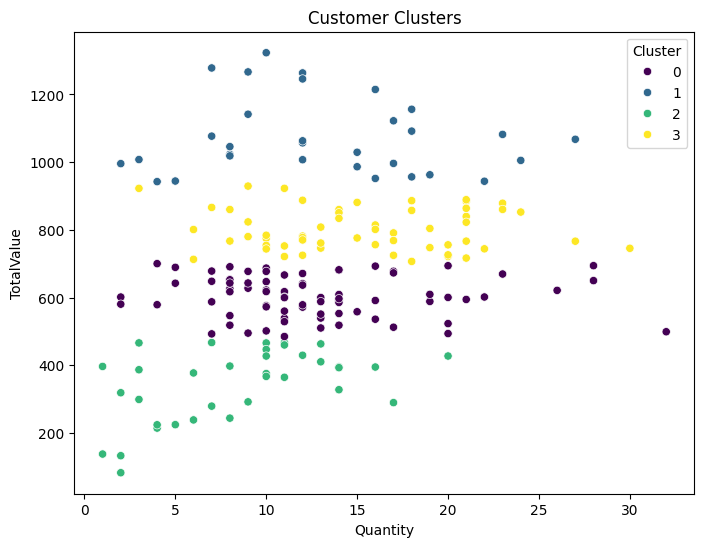

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Basic exploration
print(customers.info())
print(products.info())
print(transactions.info())

# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Merge datasets
data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Example analysis
region_sales = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print(region_sales)

# Feature engineering
customer_features = data.groupby('CustomerID').agg({
    'Quantity': 'sum', 'TotalValue': 'mean'
}).reset_index()

# Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(customer_features[['Quantity', 'TotalValue']])

# Evaluate clusters
db_index = davies_bouldin_score(customer_features[['Quantity', 'TotalValue']], customer_features['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Quantity', y='TotalValue', hue='Cluster', data=customer_features, palette='viridis')
plt.title('Customer Clusters')
plt.show()
